In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix


In [34]:
X = np.array([
    [0, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 1, 0, 1, 0],
     [0, 1, 1, 0, 0, 0, 1],
      [1, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1],
        [1, 1,1 , 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 1, 0],
           [1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0],
             [1, 1, 1, 1, 1, 1, 0],
              [0, 1, 1, 0, 0, 0, 0],
               [1, 1, 0, 1, 1, 0, 1],
                [1, 1, 1, 1, 0, 0, 1],
                 [0, 1, 1, 0, 0, 1, 1],
                  [1, 0, 1, 1, 0, 1, 1],
                   [1, 0, 1, 1, 1, 1, 1],
                    [1, 1, 1, 0, 0, 0, 0],
                     [1, 1, 1, 1, 1, 1, 1],
                      [1, 1, 1, 1, 0, 1, 1],
                        [1, 1, 1, 1, 1, 0, 0],
 [0, 1, 1, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1, 0],
   [1, 0, 0, 0, 1, 1, 0],
    [1, 0, 1, 1, 0, 1, 0],
     [0, 0, 1, 1, 0, 1, 0]])
Y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1, 0,1,1,0,0,0])

In [35]:
X.shape

(26, 7)

In [36]:
Y.shape

(26,)

In [37]:
lr = [0.1, 0.01, 0.001, 0.0001]

In [38]:


optimizer = tf.keras.optimizers.Adam(
    learning_rate=lr[3],
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape = (7, ), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    #  tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

In [40]:
# Defining the number of folds (N) for cross-validation:
n_splits = 5

In [41]:
# Initialize a StratifiedKFold object to create the training and testing folds:
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


In [42]:
# evaluation matrix

accuracy_scores = []
specificity_scores = []
sensitivity_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


In [43]:
num_epochs = 100
batch_size = 1
for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Compile and train your model for each fold
    model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)

    # Predict labels for the test set
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    recall = sensitivity
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Append the metrics to their respective lists
    accuracy_scores.append(accuracy)
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score)

# Calculate the mean and standard deviation of the evaluation metrics
mean_accuracy = np.mean(accuracy_scores)
mean_specificity = np.mean(specificity_scores)
mean_sensitivity = np.mean(sensitivity_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1_score = np.mean(f1_scores)





1/1 [==============================] - 0s 78ms/step


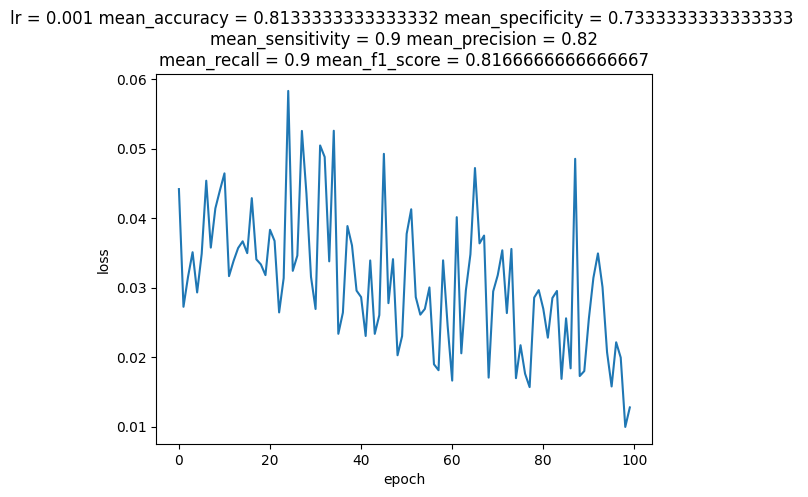

In [44]:
plt.plot(history.history['loss'])
plt.title(f'''lr = {lr[2]} mean_accuracy = {mean_accuracy} mean_specificity = {mean_specificity}
mean_sensitivity = {mean_sensitivity} mean_precision = {mean_precision}
mean_recall = {mean_recall} mean_f1_score = {mean_f1_score}''')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("N-Fold-Cross Validation")

In [ ]:
# std_accuracy = np.std(accuracy_scores)
# std_specificity = np.std(specificity_scores)
# std_sensitivity = np.std(sensitivity_scores)
# std_precision = np.std(precision_scores)
# std_recall = np.std(recall_scores)
# std_f1_score = np.std(f1_scores)

# # Print or use the mean and standard deviation as your evaluation metrics


In [ ]:
# history = model.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), validation_batch_size=1 , epochs=100, batch_size=1)

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.2553 - accuracy: 0.6000 - val_loss: 0.2346 - val_accuracy: 0.6667
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.2625 - accuracy: 0.5000 - val_loss: 0.2359 - val_accuracy: 0.6667
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 0.5000 - val_loss: 0.2372 - val_accuracy: 0.6667
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2409 - accuracy: 0.5500 - val_loss: 0.2388 - val_accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2549 - accuracy: 0.4500 - val_loss: 0.2394 - val_accuracy: 0.6667
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2548 - accuracy: 0.5500 - val_loss: 0.2414 - val_accuracy: 0.5000
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2576 - accuracy: 0.5500 - val_loss: 0.2420 - val_accuracy: 0.5000
Epoch 8/100


In [ ]:
plt.plot(history.history['loss'])
plt.title(f"lr = {lr[0]} train_accuracy = {history.history['accuracy'][-1]} test_accuracy = {history.history['val_accuracy'][-1]}")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("Result 1")

Text(0, 0.5, 'loss')

In [ ]:
# plt.plot(history.history['loss'])
# plt.title(f"lr = {lr[1]} train_accuracy = {history.history['accuracy'][-1]} test_accuracy = {history.history['val_accuracy'][-1]}")
# plt.xlabel("epoch")
# plt.ylabel("loss")
# plt.savefig("Result 2")

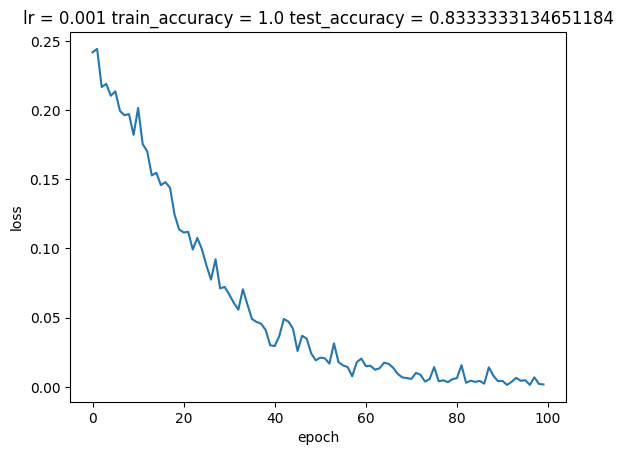

In [ ]:
plt.plot(history.history['loss'])
plt.title(f"lr = {lr[2]} train_accuracy = {history.history['accuracy'][-1]} test_accuracy = {history.history['val_accuracy'][-1]}")
plt.xlabel("epoch")
plt.ylabel("loss")
# plt.savefig("Result 3")

In [ ]:
plt.plot(history.history['loss'])
plt.title(f"lr = {lr[3]} train_accuracy = {history.history['accuracy'][-1]} test_accuracy = {history.history['val_accuracy'][-1]}")
plt.xlabel("epoch")
plt.ylabel("loss")
# plt.savefig("Result 4")